[[228.47729755 450.45677419]
 [870.44077071  97.23214286]
 [ 93.27479157  98.34701738]]


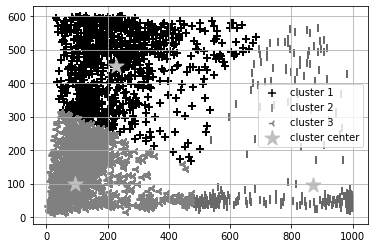

In [30]:
# -*- coding: utf8 -*-
import sys
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

XML_EXT = '.xml'
ENCODE_METHOD = 'utf-8'

#pascalVocReader readers the voc xml files parse it
class PascalVocReader:
    """
    this class will be used to get transfered width and height from voc xml files
    """
    def __init__(self, filepath,width,height):
        # shapes type:
        # [labbel, [(x1,y1), (x2,y2), (x3,y3), (x4,y4)], color, color, difficult]
        self.shapes = []
        self.filepath = filepath
        self.verified = False
        self.width=width
        self.height=height

        try:
            self.parseXML()
        except:
            pass

    def getShapes(self):
        return self.shapes

    def addShape(self, bndbox, width,height):
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        width_trans = (xmax - xmin)/width*self.width
        height_trans = (ymax-ymin)/height *self.height
        points = [width_trans,height_trans]
        self.shapes.append((points))

    def parseXML(self):
        assert self.filepath.endswith(XML_EXT), "Unsupport file format"
        parser = etree.XMLParser(encoding=ENCODE_METHOD)
        xmltree = ElementTree.parse(self.filepath, parser=parser).getroot()
        pic_size = xmltree.find('size')
        size = (int(pic_size.find('width').text),int(pic_size.find('height').text))
        for object_iter in xmltree.findall('object'):
            bndbox = object_iter.find("bndbox")
            self.addShape(bndbox, *size)
        return True

class create_w_h_txt:
    def __init__(self,vocxml_path,txt_path):
        self.voc_path = vocxml_path
        self.txt_path = txt_path
    def _gether_w_h(self):
        pass
    def _write_to_txt(self):
        pass
    def process_file(self):
        file_w = open(self.txt_path,'a')
       # print (self.txt_path)
        for file in os.listdir(self.voc_path):
            file_path = os.path.join(self.voc_path, file)
            xml_parse = PascalVocReader(file_path,1000,600)
            data = xml_parse.getShapes()
            for w,h in data :
                txtstr = str(w)+' '+str(h)+'\n'
                #print (txtstr)
                file_w.write(txtstr)
        file_w.close()

class kMean_parse:
    def __init__(self,path_txt):
        self.path = path_txt
        self.km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=3000000,tol=1e-3,random_state=0)
        self._load_data()

    def _load_data (self):
        self.data = np.loadtxt(self.path)

    def parse_data (self):
        self.y_k = self.km.fit_predict(self.data)
        print(self.km.cluster_centers_)

    def plot_data (self):
        plt.scatter(self.data[self.y_k == 0, 0], self.data[self.y_k == 0, 1], s=50, c="black", marker="+", label="cluster 1")
        plt.scatter(self.data[self.y_k == 1, 0], self.data[self.y_k == 1, 1], s=50, c="dimgray", marker="|", label="cluster 2")
        plt.scatter(self.data[self.y_k == 2, 0], self.data[self.y_k == 2, 1], s=50, c="gray", marker="3", label="cluster 3")
        #plt.scatter(self.data[self.y_k == 3, 0], self.data[self.y_k == 3, 1], s=50, c="gray", marker="*",label="cluster 4")
        #plt.scatter(self.data[self.y_k == 4, 0], self.data[self.y_k == 4, 1], s=50, c="yellow", marker="d",label="cluster 5")
       # draw the centers
        plt.scatter(self.km.cluster_centers_[:, 0], self.km.cluster_centers_[:, 1], s=250, marker="*", c="silver", label="cluster center")
        plt.legend()
        plt.grid()
        
        plt.show()




if __name__ == '__main__':
     whtxt = create_w_h_txt("GC10-DET/Annotations","./data1.txt") #指定为voc标注路径，以及存放生成文件路径
     whtxt.process_file()
     kmean_parse = kMean_parse("./data1.txt")#路径和生成文件相同。
     kmean_parse.parse_data()
     kmean_parse.plot_data() #绘图部分只支持五个簇，要增加，需要自家改代码即可

In [4]:
# -*- coding: utf8 -*-
import sys
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

XML_EXT = '.xml'
ENCODE_METHOD = 'utf-8'

#pascalVocReader readers the voc xml files parse it
class PascalVocReader:
    """
    this class will be used to get transfered width and height from voc xml files
    """
    def __init__(self, filepath,width,height):
        # shapes type:
        # [labbel, [(x1,y1), (x2,y2), (x3,y3), (x4,y4)], color, color, difficult]
        self.shapes = []
        self.filepath = filepath
        self.verified = False
        self.width=width
        self.height=height

        try:
            self.parseXML()
        except:
            pass

    def getShapes(self):
        return self.shapes

    def addShape(self, bndbox, width,height):
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        width_trans = (xmax - xmin)/width*self.width
        height_trans = (ymax-ymin)/height *self.height
        points = [width_trans,height_trans]
        self.shapes.append((points))

    def parseXML(self):
        assert self.filepath.endswith(XML_EXT), "Unsupport file format"
        parser = etree.XMLParser(encoding=ENCODE_METHOD)
        xmltree = ElementTree.parse(self.filepath, parser=parser).getroot()
        pic_size = xmltree.find('size')
        size = (int(pic_size.find('width').text),int(pic_size.find('height').text))
        for object_iter in xmltree.findall('object'):
            bndbox = object_iter.find("bndbox")
            self.addShape(bndbox, *size)
        return True

class create_w_h_txt:
    def __init__(self,vocxml_path,txt_path):
        self.voc_path = vocxml_path
        self.txt_path = txt_path
    def _gether_w_h(self):
        pass
    def _write_to_txt(self):
        pass
    def process_file(self):
        file_w = open(self.txt_path,'a')
       # print (self.txt_path)
        for file in os.listdir(self.voc_path):
            file_path = os.path.join(self.voc_path, file)
            xml_parse = PascalVocReader(file_path,304,304)
            data = xml_parse.getShapes()
            for w,h in data :
                txtstr = str(w)+' '+str(h)+'\n'
                #print (txtstr)
                file_w.write(txtstr)
        file_w.close()

class kMean_parse:
    def __init__(self,path_txt):
        self.path = path_txt
        self.km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=3000000,tol=1e-3,random_state=0)
        self._load_data()

    def _load_data (self):
        self.data = np.loadtxt(self.path)

    def parse_data (self):
        self.y_k = self.km.fit_predict(self.data)
        print(self.km.cluster_centers_)

    def plot_data (self):
        plt.scatter(self.data[self.y_k == 0, 0], self.data[self.y_k == 0, 1], s=50, c="orange", marker="o", label="cluster 1")
        plt.scatter(self.data[self.y_k == 1, 0], self.data[self.y_k == 1, 1], s=50, c="green", marker="s", label="cluster 2")
        plt.scatter(self.data[self.y_k == 2, 0], self.data[self.y_k == 2, 1], s=50, c="blue", marker="^", label="cluster 3")
        #plt.scatter(self.data[self.y_k == 3, 0], self.data[self.y_k == 3, 1], s=50, c="gray", marker="*",label="cluster 4")
        #plt.scatter(self.data[self.y_k == 4, 0], self.data[self.y_k == 4, 1], s=50, c="yellow", marker="d",label="cluster 5")
       # draw the centers
        plt.scatter(self.km.cluster_centers_[:, 0], self.km.cluster_centers_[:, 1], s=250, marker="*", c="red", label="cluster center")
        plt.legend()
        plt.grid()
        plt.show()




if __name__ == '__main__':
     whtxt = create_w_h_txt("VOC2007/Annotations","./data1.txt") #指定为voc标注路径，以及存放生成文件路径
     whtxt.process_file()
     kmean_parse = kMean_parse("./data1.txt")#路径和生成文件相同。
     kmean_parse.parse_data()
     kmean_parse.plot_data() #绘图部分只支持五个簇，要增加，需要自家改代码即可

FileNotFoundError: [Errno 2] No such file or directory: 'VOC2007/Annotations'

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 7.2 MB 222 kB/s eta 0:00:011
     |████████████████████████████████| 28.7 MB 726 kB/s eta 0:00:01
     |████████████████████████████████| 300 kB 305 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=4a922480397d55aff1d8be57b9e97b2a1b90e576597082c05a75fa5adcf74922
  Stored in directory: /Users/xupeng/Library/Caches/pip/wheels/fd/ab/fb/a008fc45aa0b0e83bafb083e5e010f94cd11d988befec978af
Successfully built sklearn


In [6]:
pwd

'/Users/xupeng/Desktop/Mac/python-jupyter代码'